In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from analyze_utilities import *
from dataset_utilities import create_cifar10_dataloaders

In [3]:
# Open results files
json_file_name_CIFAR100 = '../output/OutOfDist_CIFR100_results_20180810_153726/results_OutOfDist_CIFR100_20180810_153726.json'
json_file_name_Noise = '../output/OutOfDist_Noise_results_20180811_100246/results_OutOfDist_Noise_20180811_100246.json'
json_file_name_ERM = '../output/ERM_results_20180813_204946/results_ERM_20180813_204946.json'

# To dict
with open(json_file_name_CIFAR100) as data_file:    
    results_dict_CIFAR100 = json.load(data_file)
with open(json_file_name_Noise) as data_file:    
    results_dict_Noise = json.load(data_file)
with open(json_file_name_ERM) as data_file:    
    results_dict_ERM = json.load(data_file)

# CIFAR 10    
json_files_name_NML = ['../output/NML_results_20180812_074608/results_NML_20180812_074608.json', # 0-19
                       '../output/NML_results_20180812_173610/results_NML_20180812_173610.json', # 20-34
                       '../output/NML_results_20180813_063715/results_NML_20180813_063715.json', # 35-50  
                       '../output/NML_results_20180812_174855/results_NML_20180812_174855.json', # 51-59 
                       '../output/NML_results_20180813_154525/results_NML_20180813_154525.json'] # 60-75
results_dict_NML = {}
for json_file_name_NML in json_files_name_NML:
    with open(json_file_name_NML) as data_file:    
        results_dict_NML.update(json.load(data_file)) 

# Visualize Out of Disterbution
Plot histogram of the normalization factor from based on 
1. cifar10 dataset
2. cifar 100 dataset
3. Noise images

log10(NormalizationFactor): [cifar10 cifar100 Noise]=[0.290152 0.284161 0.578421] 


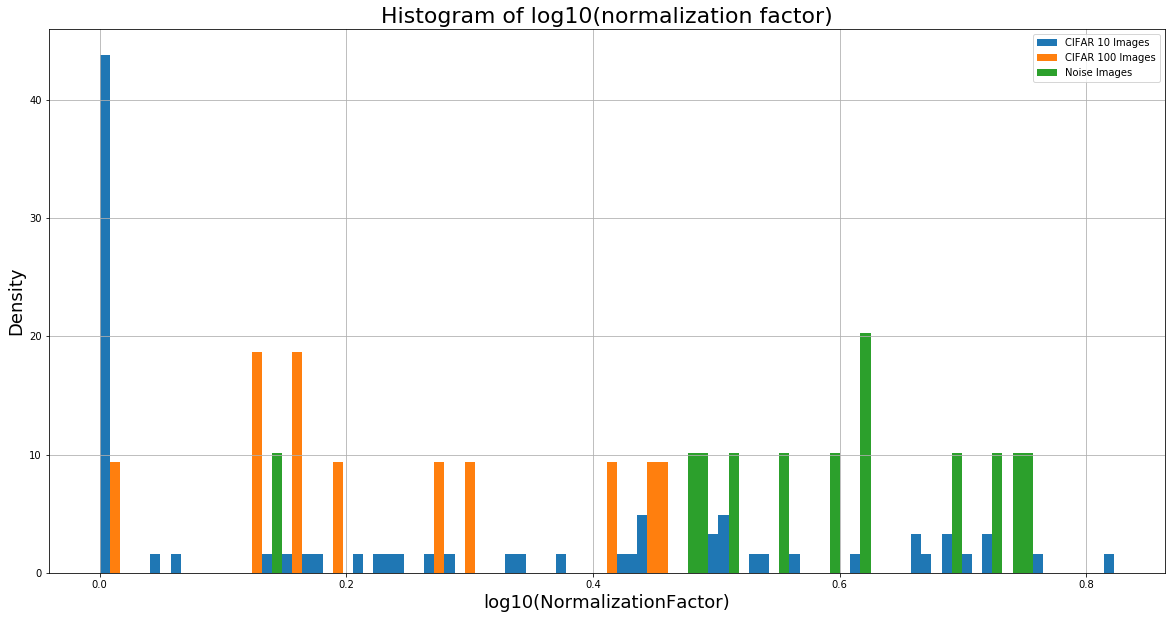

In [4]:
# Figure params
plt.figure(figsize=(20,10))
bins= 100

# Extract and plot normalization factor
normalization_factor_CIFAR10_list, _ = get_normalization_factor_from_dict(results_dict_NML)
normalization_factor_CIFAR100_list, _ = get_normalization_factor_from_dict(results_dict_CIFAR100)
normalization_factor_Noise_list, _ = get_normalization_factor_from_dict(results_dict_Noise)

log_normalization_factor_CIFAR10_list = np.log10(normalization_factor_CIFAR10_list)
log_normalization_factor_CIFAR100_list = np.log10(normalization_factor_CIFAR100_list)
log_normalization_factor_Noise_list = np.log10(normalization_factor_Noise_list).tolist()

# Print the mean
print('log10(NormalizationFactor): [cifar10 cifar100 Noise]=[%f %f %f] ' % 
      (np.mean(log_normalization_factor_CIFAR10_list), 
       np.mean(log_normalization_factor_CIFAR100_list), 
       np.mean(log_normalization_factor_Noise_list)))

# Initalize joint bins
n, bins, patches = plt.hist([log_normalization_factor_CIFAR10_list,
                             log_normalization_factor_CIFAR100_list,
                             log_normalization_factor_Noise_list], alpha=1, density=True,
                            label=['CIFAR 10 Image', 'CIFAR 100 Image', 'Noise Image'], bins=bins)
plt.gcf().clear()

# Plot
plt.hist(log_normalization_factor_CIFAR10_list, alpha=1, density=True, label='CIFAR 10 Images', bins=bins)
plt.hist(log_normalization_factor_CIFAR100_list, alpha=1, density=True, label='CIFAR 100 Images', bins=bins)
plt.hist(log_normalization_factor_Noise_list, alpha=1, density=True, label='Noise Images', bins=bins)

plt.ylabel('Density', fontsize=18)
plt.xlabel('log10(NormalizationFactor)', fontsize=18)
plt.title('Histogram of log10(normalization factor)', fontsize=22)
plt.grid()
plt.legend()
plt.show()


# Visualize the Loss of the Diffrent Methods
1. Empiriical Risk Minimization (ERM)
2. Normalized Maximum Likelihood (NML)
3. Jinni- model which was trained real label of the test sample

[NML ERM Jinni]: Acc=[0.906667 0.918300 1.000000], Loss=[0.295071 0.194362 0.004919]


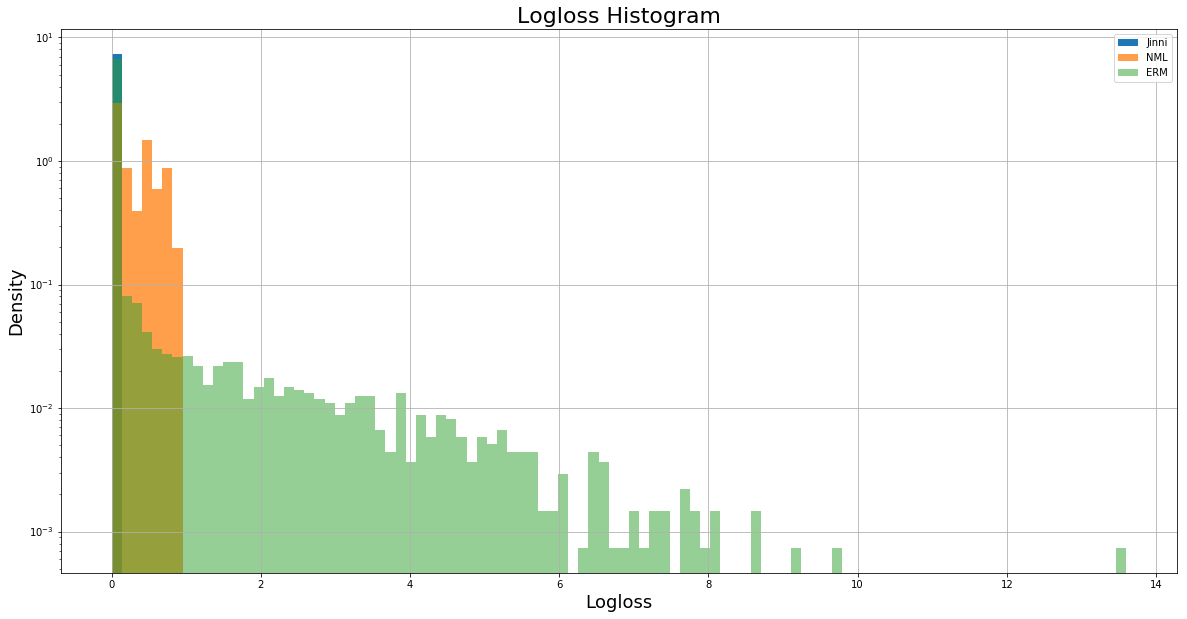

In [20]:
# Plot params
plt.figure(figsize=(20,10))
bins= 100

# Extract from dict
loss_NML_list, acc_NML = get_NML_log_loss_from_dict(results_dict_NML)
loss_ERM_list, acc_ERM = get_ERM_log_loss_from_dict(results_dict_NML)
loss_Jinni_list, acc_Jinni = get_jinni_log_loss_from_dict(results_dict_NML)

# All ERM
loss_ERM_list, acc_ERM = get_ERM_log_loss_from_dict(results_dict_ERM)

# Print acc and mean loss
print('[NML ERM Jinni]: Acc=[%f %f %f], Loss=[%f %f %f]' % 
      (acc_NML, acc_ERM, acc_Jinni, np.mean(loss_NML_list), np.mean(loss_ERM_list), np.mean(loss_Jinni_list)))

# Plot
n, bins, patches = plt.hist([loss_NML_list, loss_Jinni_list, loss_ERM_list], bins=bins, alpha=1, label=['NML', 'Jinni', 'ERM'], density=True)
plt.gcf().clear()
plt.hist(loss_Jinni_list, bins=bins, alpha=1, label='Jinni', density=True)
plt.hist(loss_NML_list, bins=bins, alpha=0.75, label='NML', density=True)
plt.hist(loss_ERM_list, bins=bins, alpha=0.5, label='ERM', density=True)
plt.ylabel('Density', fontsize=18)
plt.xlabel('Logloss', fontsize=18)
plt.title('Logloss Histogram', fontsize=22)
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

# Log10(Normalization Factor)

Correct Incorrect number = [68 7] 


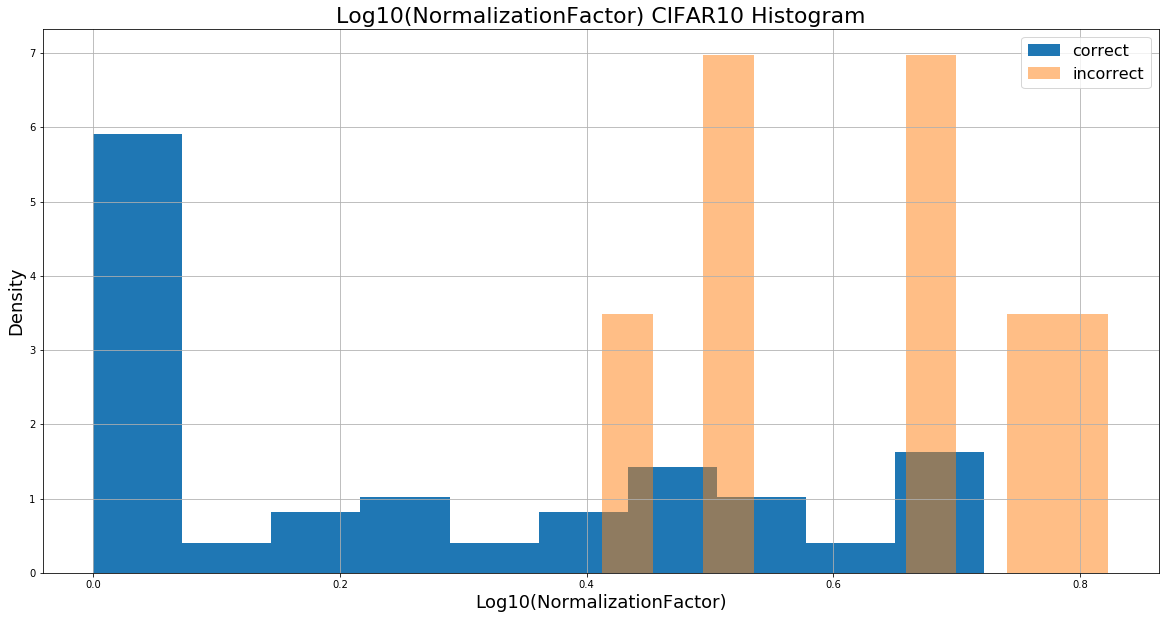

In [22]:
# Plot params
plt.figure(figsize=(20,10))
bins= 10

# Extract
normalization_factor_CIFAR10_list, is_correct_list = get_normalization_factor_from_dict(results_dict_NML)
correct =  np.log10(np.array(normalization_factor_CIFAR10_list)[np.array(is_correct_list)])
incorrect =  np.log10(np.array(normalization_factor_CIFAR10_list)[~np.array(is_correct_list)])
print('Correct Incorrect number = [%d %d] '% (correct.shape[0], incorrect.shape[0]))
# Plot
plt.hist(correct, alpha=1, density=True, label='correct')
plt.hist(incorrect, alpha=0.5, density=True, label='incorrect')
plt.ylabel('Density', fontsize=18)
plt.xlabel('Log10(NormalizationFactor)', fontsize=18)
plt.title('Log10(NormalizationFactor) CIFAR10 Histogram', fontsize=22)
plt.grid()
plt.legend(loc=1, prop={'size': 16})
plt.show()

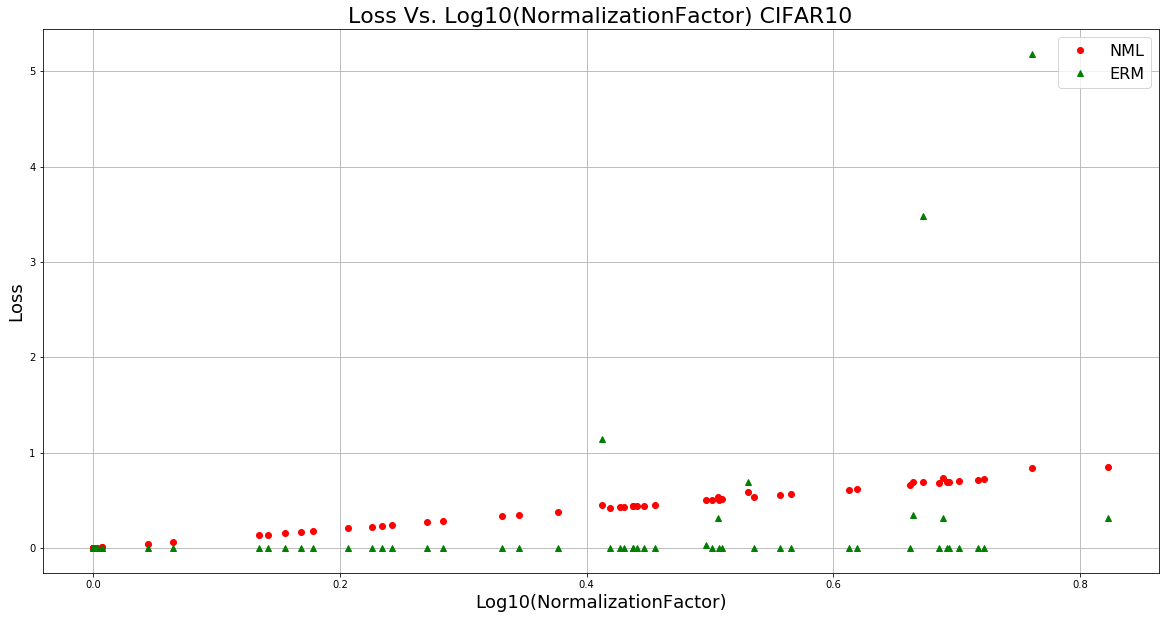

In [23]:
# Plot params
plt.figure(figsize=(20,10))

# Extract
loss_NML_list, _ = get_NML_log_loss_from_dict(results_dict_NML)
loss_ERM_list, _ = get_ERM_log_loss_from_dict(results_dict_NML)
loss_Jinni_list, _ = get_jinni_log_loss_from_dict(results_dict_NML)
normalization_factor_CIFAR10_list, _ = get_normalization_factor_from_dict(results_dict_NML)
log_norm_factor = np.log10(normalization_factor_CIFAR10_list)

# Plot
plt.plot(list(log_norm_factor), loss_NML_list, 'ro', label='NML')
plt.plot(list(log_norm_factor), loss_ERM_list, 'g^', label='ERM')
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Log10(NormalizationFactor)', fontsize=18)
plt.title('Loss Vs. Log10(NormalizationFactor) CIFAR10', fontsize=22)
plt.grid()
plt.legend(loc=1, prop={'size': 16})
plt.show()

# Visualize Specific Sample

In [6]:
for idx, (nml, erm, jinni, sample_idx) in \
  enumerate(zip(loss_NML_list, loss_ERM_list, loss_Jinni_list, results_dict_NML)):
    print('NML ERM Jinni: %d [%f %f %f]' % (int(sample_idx), nml, erm, jinni))

NML ERM Jinni: 0 [0.000057 -0.000000 -0.000000]
NML ERM Jinni: 1 [0.002582 -0.000000 -0.000000]
NML ERM Jinni: 10 [0.430098 0.000023 0.000003]
NML ERM Jinni: 11 [0.000000 0.000004 -0.000000]
NML ERM Jinni: 12 [0.537174 0.000002 0.030397]
NML ERM Jinni: 13 [0.000002 0.000798 -0.000000]
NML ERM Jinni: 14 [0.007136 0.039069 -0.000000]
NML ERM Jinni: 15 [0.441039 0.000000 0.000000]
NML ERM Jinni: 16 [0.226142 -0.000000 -0.000000]
NML ERM Jinni: 17 [0.001726 0.000000 -0.000000]
NML ERM Jinni: 18 [0.000000 -0.000000 -0.000000]
NML ERM Jinni: 19 [0.000449 0.000221 -0.000000]
NML ERM Jinni: 2 [0.283833 0.031240 0.000064]
NML ERM Jinni: 3 [0.427239 0.000001 0.000121]
NML ERM Jinni: 4 [0.000001 0.000218 -0.000000]
NML ERM Jinni: 5 [0.270355 -0.000000 0.000001]
NML ERM Jinni: 6 [0.155014 0.000002 0.000001]
NML ERM Jinni: 7 [0.234376 0.000000 0.000001]
NML ERM Jinni: 8 [0.168368 -0.000000 0.000000]
NML ERM Jinni: 9 [0.000883 -0.000000 -0.000000]
NML ERM Jinni: 20 [0.703442 -0.000000 0.001855]
NML 

In [ ]:
# Load CIFAR10 dataset
trainloader, testloader, classes =  create_cifar10_dataloaders('../data', 1, 1)

idx = 42
prob_jinni, true_label, predicted_jinni_label = extract_jinni_probabilities_list(results_dict_NML[str(idx)])
loss_jinni = compute_log_loss(prob_jinni, true_label)
print(prob_jinni)
print('Loss: %f, [true predicted]=[%f %f], [%s %s]' % 
      (loss_jinni, true_label, predicted_jinni_label, classes[true_label], classes[predicted_jinni_label]))

In [ ]:
# Show Sample
idx = 42
print('Sowing test sample %d' % idx)
data = testloader.dataset.test_data[idx]
label = testloader.dataset.test_labels[idx]
plt.imshow(data)
plt.title(classes[label])
print(label)
print(classes)